# 可視化

## セットアップ

- Pycairo [Linux](https://pycairo.readthedocs.io/en/latest/)・[(非公式)Windows](https://www.lfd.uci.edu/~gohlke/pythonlibs/#pycairo)
- igraph [python-igraph](https://igraph.org/python/)

## 木構造

Reingold Tilfordアルゴリズムを用いる。計算時間は$\mathcal{O}(N)$。

二分ヒープの可視化例を示す。

In [ ]:
import io
from pathlib import Path
import igraph
from igraph.drawing.utils import BoundingBox
import cairo
import IPython.display


def heapplot(h, bbox=(200, 200), margin=(20, 20, 20, 20)):
    """Show heap as a binary tree.

    """
    g = igraph.Graph()
    g.add_vertices(len(h))
    for i in range(len(h)):
        l = (i<<1) + 1
        r = (i<<1) + 2
        edges = list()
        if l < len(h):
            edges.append((i, l))
        if r < len(h):
            edges.append((i, r))
        g.add_edges(edges)
    g.vs["label"] = h
    layout = g.layout_reingold_tilford(root=[0])
    
    bb = BoundingBox(bbox)
    bio = io.BytesIO()
    with cairo.ImageSurface(
        cairo.FORMAT_ARGB32, int(bb.width), int(bb.height)) as surface:
        igraph.plot(g, target=surface, bbox=bb, layout=layout, margin=margin).save(bio)
        return IPython.display.Image(bio.getbuffer())

In [2]:
from heapq import heappush, heappop

h = []
heappush(h, (5, 'write code'))
heappush(h, (7, 'release product'))
heappush(h, (1, 'write spec'))
heappush(h, (3, 'create tests'))

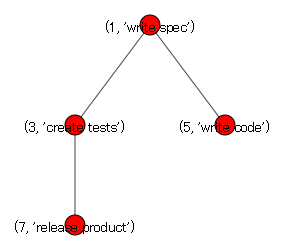

In [3]:
heapplot(h, bbox=(300, 250), margin=(75, 25, 75, 25))

In [4]:
heappop(h)

(1, 'write spec')

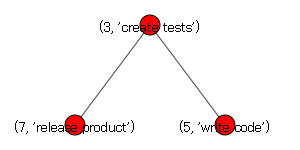

In [5]:
heapplot(h, bbox=(300, 150), margin=(75, 25, 75, 25))